In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils import load_write
lw = load_write.Load_Write()

In [2]:
jobs_csv = "cascadia_profile_B_exercise_log.csv"
jobs_log = pd.read_csv(jobs_csv,comment='#')

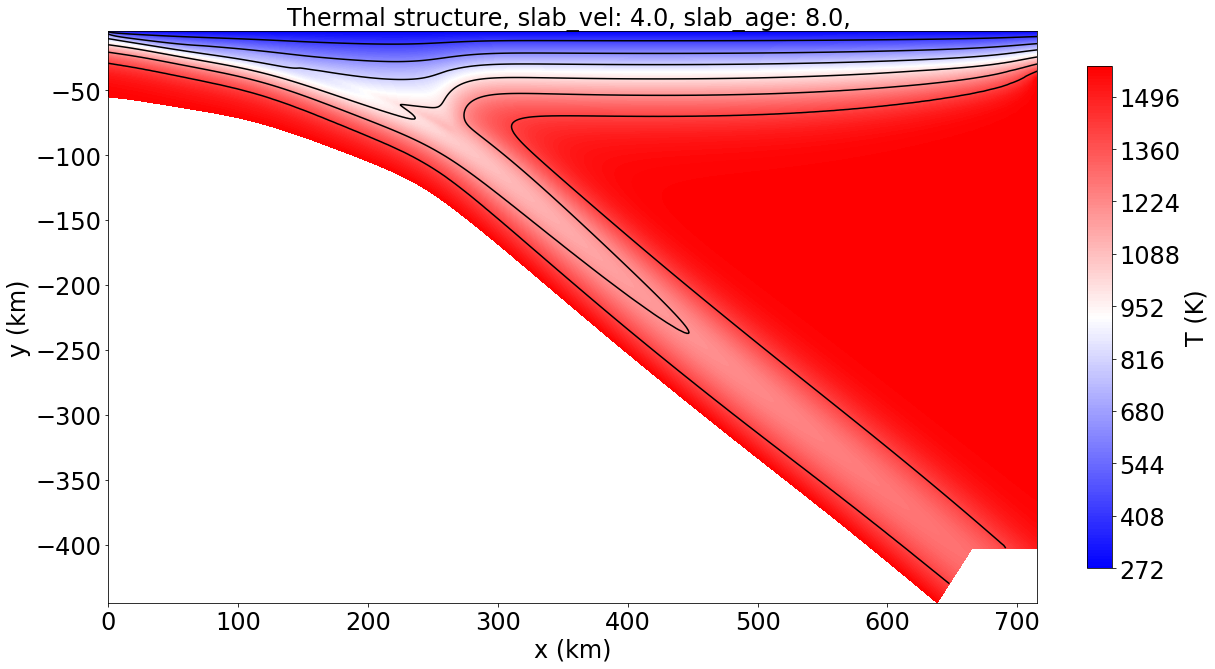

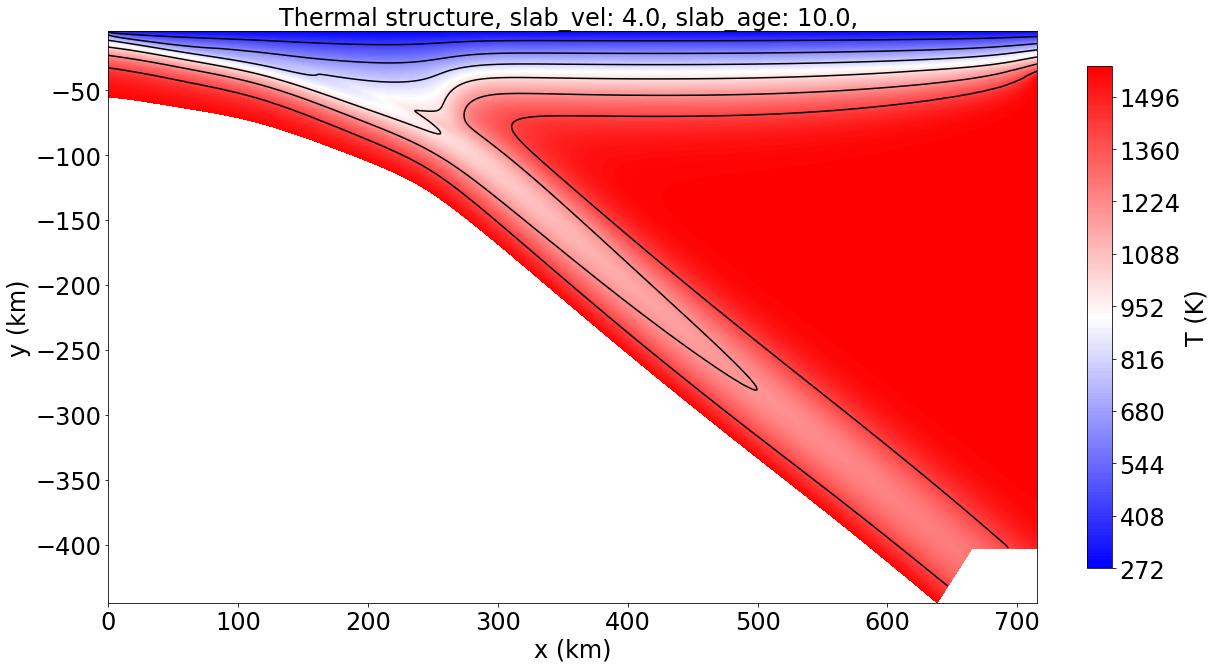

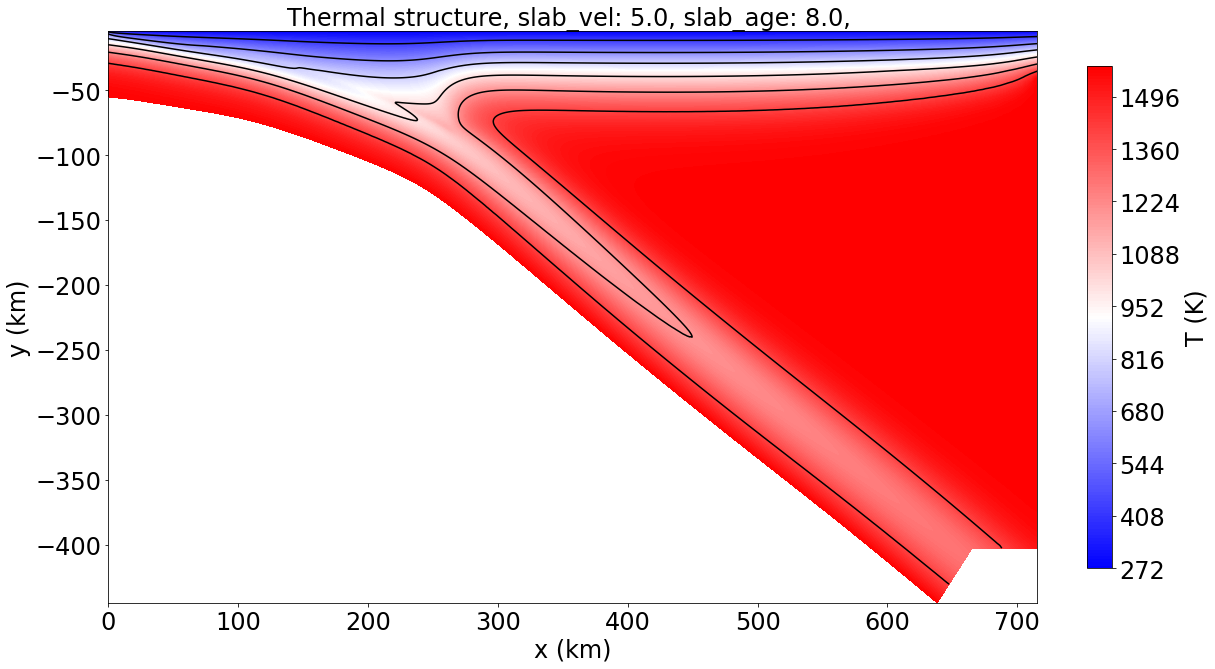

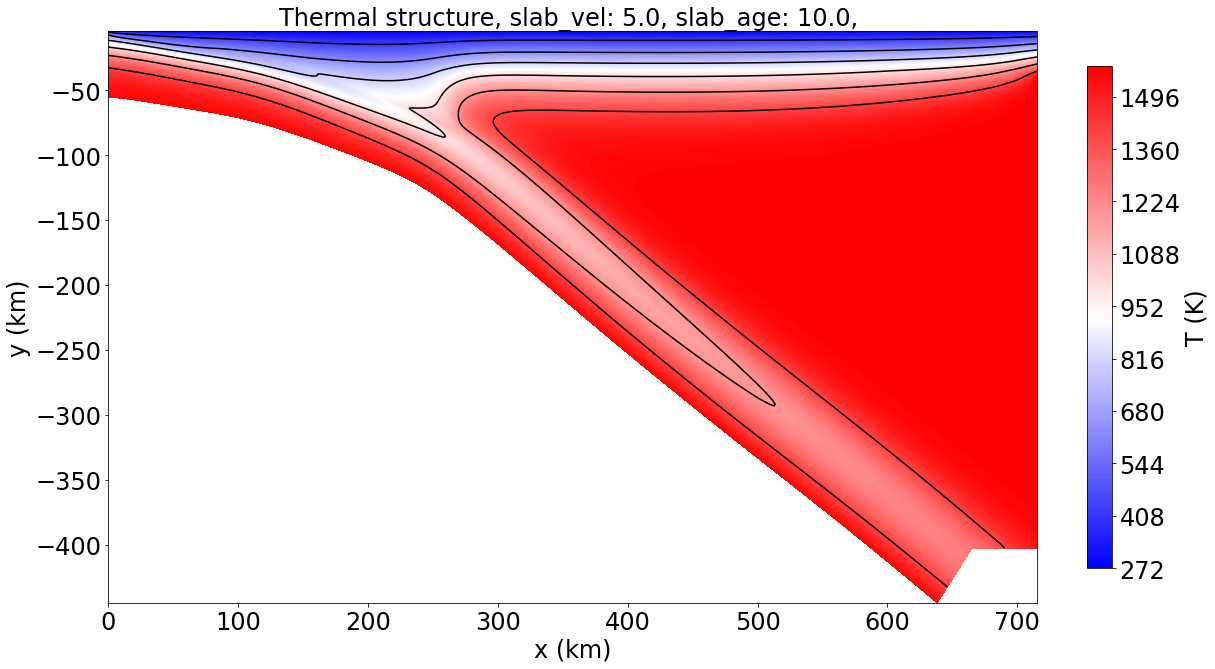

In [3]:
for dir in jobs_log["path"]:
    # load in the temperature field and the triangulation
    result = lw.load(os.path.join(dir, "temperature_reordered.pkl"))
    tri_mesh = lw.load(os.path.join(dir, "tri_mesh.pkl"))

    # this part is optional, it pulls the parameter values for the job out and makes a nice string for the title
    param_info = pd.read_csv(os.path.join(dir, "params.csv"), header=None, delimiter=' ')
    param_str = ''.join(param_info.iloc[k,0] + ": " + str(param_info.iloc[k,1]) + ", " for k in range(len(param_info)))
    
    # make some choices for the plot
    font_size = 24
    cmap_name = 'bwr'
    level_vals = (423,623,800,1000,1200,1400)
    title = 'Thermal structure, ' + param_str

    # plot the result as a tricontourf and add black contours for certain isotherms
    fig = plt.figure(figsize=(18,12))
    ax1 = fig.add_subplot(111)
    ax1.set_aspect('equal')
    cfill = ax1.tricontourf(tri_mesh, result, levels=200, cmap=cmap_name)
    cb = plt.colorbar(cfill, ax=ax1, fraction=0.025)
    cb.set_label(label='T (K)', fontsize=font_size)
    cb.ax.tick_params(labelsize=font_size)
    contours = ax1.tricontour(tri_mesh, result, levels=level_vals, colors='k')

    fig = plt.xlabel('x (km)', fontsize=font_size)
    fig = plt.ylabel('y (km)', fontsize=font_size)
    fig = plt.xticks(fontsize=font_size)
    fig = plt.yticks(fontsize=font_size)
    fig = plt.title(title, fontsize=font_size)
    plt.xticks(fontsize=font_size);
    plt.yticks(fontsize=font_size);
    # plt.xlim([0,350])
    # plt.ylim([-150,0])
    # plt.savefig(self.png_name)
    plt.show()